include library

In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

membaca file

In [28]:
c = pd.read_csv("crypto.csv", header = None)

mengecek

In [29]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632218 entries, 0 to 632217
Data columns (total 1 columns):
0    632218 non-null float64
dtypes: float64(1)
memory usage: 4.8 MB


In [30]:
c.head()

0
0  0.000015
1  0.000023
2  0.000033
3  0.000037
4  0.000037

histogram

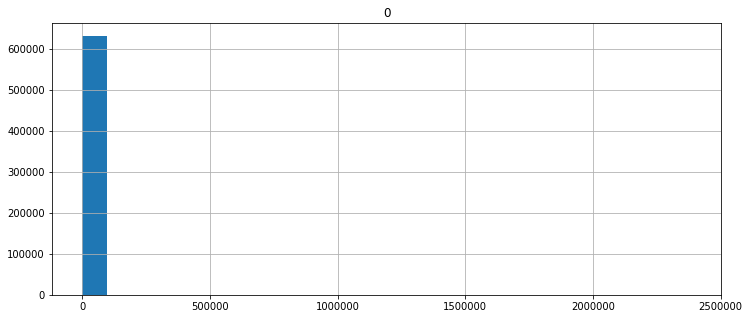

In [31]:
c.hist(bins = 25 , figsize= (12,5)) ;

boxplot

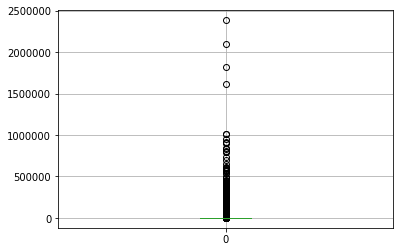

In [32]:
boxplot = c.boxplot()

nilai minimal

In [33]:
c.min()

0    2.925000e-09
dtype: float64

nilai maksimal

In [34]:
c.max()

0    2383502.5
dtype: float64

nilai rata rata

In [35]:
c.mean()

0    203.018146
dtype: float64

modus

In [36]:
c.mode();

median

In [37]:
c.median()

0    0.009734
dtype: float64

variansi

In [38]:
c.var()

0    7.532042e+07
dtype: float64

standar deviasi

In [39]:
c.std()

0    8678.733503
dtype: float64

skewness

In [40]:
c.skew()

0    118.239608
dtype: float64

kurtosis

In [41]:
c.kurtosis()

0    22297.470843
dtype: float64

menggambar distribusi

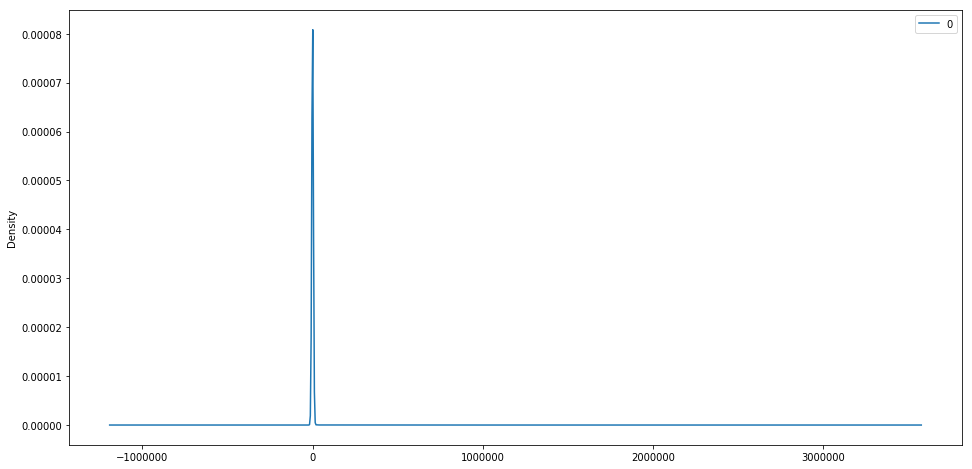

In [42]:
c.plot.kde(figsize = (16,8), bw_method = 0.55)

mencocokkan jenis distribusi

In [43]:
import numpy as np
import scipy.stats as st
def best_fit_distribution(data, bins=200, ax=None):
    #histogram data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    #jenis distribusi yang akan di cocokkan
    DISTRIBUTIONS = [        
        st.alpha,
        st.chi,
        st.chi2,
        st.expon,
        st.gamma,
        st.norm,
        st.uniform,
    ]

    #inisialisasi
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    #proses pencocokan
    for distribution in DISTRIBUTIONS:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                params = distribution.fit(data)
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                
                print(distribution.name, " : ",sse)
                
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [44]:
a = best_fit_distribution(c)

alpha  :  7.0175117348950735e-09
chi  :  5.440158792126901e-09
chi2  :  5.61074742823863e-09
expon  :  7.017543683778399e-09
gamma  :  7.017543683926197e-09
norm  :  2.2305732229530877e-09
uniform  :  6.982339135973196e-09


distribusi yang tepat adalah normal distribution

In [45]:
print(a)

('norm', (203.01814563577895, 8678.726639053722))


jawaban a i

In [46]:
from scipy.stats import norm
a1 = 1000* norm.cdf(0.177013,c.mean(),c.std())
print(a1)

[490.67668834]


jawaban a ii

In [47]:
a2 = 1000*norm.cdf(177.013,c.mean(),c.std())
print(a2)

[498.80460247]


jawaban b i

In [48]:
b1 = norm.cdf(0.013, c.mean(), c.std())
print(1-b1)

[0.50933085]


jawaban b ii

In [49]:
b2 = norm.cdf(17.7, c.mean(), c.std())
print(b2)

[0.49148198]
